# Por qué la gente renuncia a sus puestos. 

Este proyecto tiene como objetivo entregar información útil para empleadores,en cuanto a detectar las principales razones de renuncia de sus empleados. Se pretene responder preguntas tales como:

* ¿ Los empleados que trabajan por corto periodo de tiempo, lo hacen debido a algun tipo de insatisfacción laboral?, ¿por que no pasa lo mismo con los trabajadores de larga data?. 

* ¿ Son los jovenes mas propensos a renunciar?


Los datos utilizados para este trabajo provienen del "Departamento de Educación, Entrenamiento y Empleo" (DETE) y del "Instituto de Educación Técnica Complementaria" (TAFE), en Australia. 

Los datos junto a la descripcion de sus encabezados pueden ser encontrados en [DATE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) y en [TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)


## Exploración de los datos

Se comenzará con la exploración de datos a fin de comprender los datos con que se trabajará. 
 En este proyecto se trabajará con las librerias de Python: Pandas y Numpy. 








In [1]:
# Incorporando librerias
import pandas as pd
import numpy as np
# Leyendo los archivos
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')
# imprimiendo contenido e información del contenido
 #DETE:
pd.options.display.max_columns = 150 # no truncar columnas
dete_survey.head() # las 5 primeras columnas

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [2]:
dete_survey.info() #Encabezados, numero y tipo de datos. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [3]:
dete_survey.isnull().sum() # ver la cantidad de datos nulos

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

En esta primera exploración se puede observar que:

* Existen muchos encabezados que no se necesitan para nuestro analisis.
* Existe un gran numero variables con contenido null
* Probablemente será necesario uniformar el formato de los encabezado.
* Hay respuestas que son 'Not Stated' en lugar de NaN  

Ahora se revisa el otro Data Frame

In [4]:
pd.options.display.max_columns = 150 
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [5]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [6]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

En el caso de TAFE las primeras observaciones son:
    
* La cantidad de nulos es menos problematico que en el caso anterior
* los encabezados son largas preguntas
* Algunos encabezados coinciden con el caso anterior

## Data Cleaning

Como pasos a seguir los mas claros por ahora son:

* a. En DETE cambia 'Not Stated' por NaN
* b. Eliminar columnas inecesarias en ambos data frames
* c. Uniformar columnas 
* d. Evaluar que columnas indican una insatisfaccion por parte del empleado. 


In [7]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated') # a. Leer los valores 'Not Stated' como NaN

In [8]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1) # b. eliminando columnas
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

c. Primeramente se observa que columnas son equivalentes entre los dos data frames, por ejemplo se observa:


DETE:                     TAFE:

ID                           Record ID
SeparationType               Reason for ceasing employment
Cease Date                   CESSATION YEAR
Age                          CurrentAge
Gender                       Gender. What is your Gender?

Para uniformar los encabezados de las columnas se utilizará el método vectorizado para cambiarlas todas a la vez

In [9]:
#DETE columns names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_') # minusculas, espacios, underscore
print(dete_survey_updated.columns)  # se observa como quedo

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [10]:
#Tafe columns names
newnames = {'Record ID': 'id','CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'}
tafe_survey_updated = tafe_survey_updated.rename(newnames, axis = 1) # renombrando las columnas
print(tafe_survey_updated.columns) # ver como quedo

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')


Recordamos que nuestro objetivo final es saber por que una persona renuncia a su cargo. Los tipos de abandono del trabajo estan en la columna 'separationtype', y de esta solo nos interesa aquellos que dicen 'Resignation'. Por ello se deben filtrar los data frame segun este criterio. 

In [11]:
# observando que tipos de 'Resignation' hay en cada data frame:

print('\nDETE DATA FRAME\n',dete_survey_updated['separationtype'].value_counts())
print('\n\nTAFE DATA FRAME\n',tafe_survey_updated['separationtype'].value_counts())


DETE DATA FRAME
 Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


TAFE DATA FRAME
 Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


De lo atnerior vemos que las resignaciones para cada data frame viene con los siguientes index:

DETE: Resignation-Other reasons, Resignation-Other employer, Resignation-Move overseas/interstate

TAFE: Resignation

En el caso de DETE los tres tipos de resignacion de interes se unificaran solo con el nombre de 'Resignation'

In [12]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0] # se corta el string y tomamos solo el primero

In [13]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy() # seleccion solo de filas de tipo Resignation
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy() # el uso de copy() es para evitar el warning SettingwithCopyWarning

### Verificación de la data

Ya se ha obtenido un data frame para DETE Y TAFE que indican las razones de renunica. Ahora se debe asegurar que la data para cada una de ellas sea correcta, sin datos corruptos o inadecuados. Si bien en la revisión de la data debe ser hecha profusamente, en este proyecto se realizarpa la revisión de las columnas con tipo de dato DATE, esto es las columnas 'cease_date' y 'dete_start_date'. Entonces se realizara la busqueda de data inconsistencias.  

In [14]:
dete_resignations['cease_date'].value_counts().sort_index(ascending = True)   # se observan valores unicos. 

01/2014     22
05/2012      2
05/2013      2
06/2013     14
07/2006      1
07/2012      1
07/2013      9
08/2013      4
09/2010      1
09/2013     11
10/2013      6
11/2013      9
12/2013     17
2010         1
2012       126
2013        74
Name: cease_date, dtype: int64

In [15]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float') 
dete_resignations['cease_date'].value_counts().sort_index(ascending = True)  

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [16]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending = True)  

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [17]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending = True) 

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

Se obseva que los datos quedaron en consistencia en cuanto al formato y tipo de datos. Por otro lado el rango de fechas que aborda cada una de los dataframes es distinto, sin embargo, como lo que nos interesa analizar los motivos de renuncias, las fechas se dejaran como estan.

### Agregando columnas necesarias

En el TAFE data frame, existe la columna llamada 'institute_service', que corresponde el tiempo total en que la persona trabajo en la empresa. Esta columna no existe en DETE y se puede generar por medio de la sustraccion de 'cese_date' y 'dete_start_date'. Se realizara esta operación agrenando la columna llamada 'institue_services' al DETE data frame.  

In [18]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

### Análisis de satisfacción de empleados
Ahora es momento de analizar las motivaciones de renuncia de los empleados. Puesto que queremos saber entre las renuncias, cuales fueron por motivos de insatisfacción laboral se determina que por insatisfacción laboral son las siguientes motivaciones por nombre de columna:

TAFE:

- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

DATE:

- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

Considerando esto último, todas estas categorias seran reunidos en 'dissatisfied', nombre de nueva columna. 


In [19]:
# Verificando los valores que son únicos
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [20]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [21]:
# En TAFE convertir los strings, en valores TRUE = si renuncia por ese motivo, FALSE = -, NaN = sin dato,  segund corresponda.

def update_values(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
    
factors = ['Contributing Factors. Job Dissatisfaction','Contributing Factors. Dissatisfaction']
tafe_resignations['dissatisfied'] = tafe_resignations[factors].applymap(update_values).any(1, skipna = False)  # se crea una columna llamada 'disatisfied'
#utilizando .any() para evaluar horizontalmente los valores de las columnas en su calidad de True, False y NaN.
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [22]:
# Idem a lo anterior para DETE
factors = ['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']
dete_resignations['dissatisfied'] = dete_resignations[factors].applymap(update_values).any(1, skipna = False)  # se crea una columna llamada 'disatisfied'
#utilizando .any() para evaluar horizontalmente los valores de las columnas en su calidad de True, False y NaN.
dete_resignations['dissatisfied'].value_counts(dropna=False)

True    311
Name: dissatisfied, dtype: int64

In [23]:
#evitar el warning SettingWithCopy Warning
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

Con esto logramos tener dete_resignation_up y tafe_resignation_up con las columnas de 'dissatisfied' lo que nos indica el numero de ex empleados que renunciaron por insatisfacción laboral o no. 

### Combining la Data
Ahora que se tiene las columnas uniformadas, es tiempo de combinar ambas datas en una guiadas segun el tiempo en que el trabajador estuvo en la empresa ('institute_service'). Para ello se realizaran los siguitnes pasos:

a. Agregar una columna con un valor distintivo a cada data frame, para que una vez combinadas se sepa que data pertenece a cual data frame. 



In [24]:
# Agregando una columna con el identificador de institucion DETE, TAFE. 
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [25]:
# Combinando ambos data frames verticalmente:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

### Eliminando columnas con NaN.

Columnas com muchos NaN, no son útiles para nuestro anális. Por ello se eliminará cualquier columna que tenga mas de 500 valores NaN. 

In [26]:
combined_updated = combined.dropna(thresh=500, axis =1).copy()

In [38]:
combined_updated['institute_service'].value_counts(dropna=False) # vemos que tienen diferentes formato de valores

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
21.0                   3
39.0                   3
30.0                   2
25.0                   2
26.0                   2
28.0                   2
36.0                   2


### Categorización
Como se ve, en la columna 'institute_service', tiene diferentes formatos en el rango de tiempo en que el trabajador laboro para la empresa. Es por ello que estos numeros se convertiran en categorias. Las categorias a utilizar seran las siguientes:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

Esta categoria se [basa](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) en el entendido que es mas importante identificar al empleado en cuanto al estado de avance de su carrera que en la edad de éste, pues dos empleados con igual edad pueden estar en una avance de carrera totalmente distinto. 


In [46]:
# Se extrae solo el valor unico de años
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')
combined_updated['institute_service_up'].head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


0     7.0
1    18.0
2     3.0
3    15.0
4     3.0
Name: institute_service_up, dtype: float64

In [53]:
#haciendo la categorizacion y aplicandola a una nueva columna llamada combined_updated['service_cat']
def levels(y):
    if y < 3:
        return 'new'
    elif 3<=y<=6:
        return 'experienced'
    elif 7 <= y <= 10:
        return 'established'
    elif pd.isnull(y):
        np.nan
    else:
        return 'veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(levels)
combined_updated['service_cat'].value_counts()

new            193
experienced    172
veteran        136
established     62
Name: service_cat, dtype: int64

## Análisis de datos

Ahora que se tiene toda la data arreglada (limpia) es posible reponder nuestras preguntas iniciales. Por ejemplo, queremos saber que porcentaje de los empleados que renunciaron por insatisfaccion laboral ( dissatisfied = True)son empleados nuevos (new). Para ello recordemos que la columna de dissatisfided esta llena con valores booleanos ( True = 1, False = 0), gracias a esto podemos agregar la información para encontrar nuestras respusetas. 



In [58]:
combined_updated['dissatisfied'].value_counts(dropna = False) #observaso la columna dissatisfied

True     402
False    241
NaN        8
Name: dissatisfied, dtype: int64

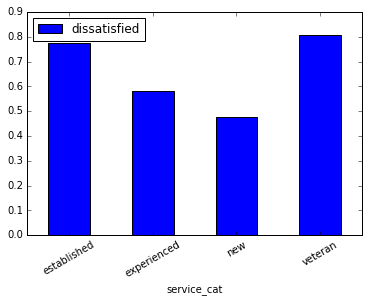

In [65]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(True)  # llenar los NaN con el mayor valor encontrado anteriormente (True)
mean_dis = combined_updated.pivot_table(values='dissatisfied', index='service_cat') # agrupando por categoria y contando los dissatisfied ( valor promedio)
%matplotlib inline 
mean_dis.plot(kind = 'bar',rot =30)

De aqui se puede concluir que aquellos trabajadores con mas de 7 años de experiencia son los mas propensos a renunciar debido a insatisfacción laboral. 